In [61]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten


In [62]:
#uploading the MNIST dataset
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()


In [63]:
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))


train_images: (60000, 28, 28)
train_labels: (60000,)
test_images:  (10000, 28, 28)
test_labels:  (10000,)


In [64]:
X_test  = test_images.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [65]:
train_images.shape

(60000, 28, 28)

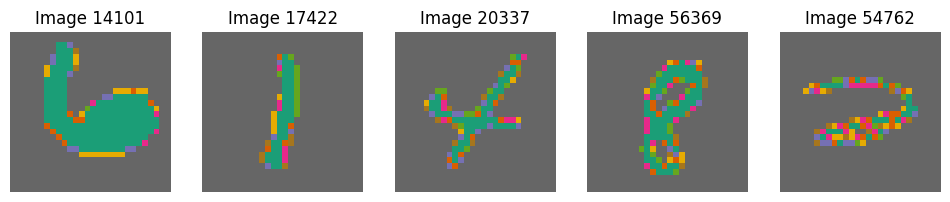

In [66]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i in range(5):
    random_index = np.random.randint(0, train_images.shape[0])
    axes[i].imshow(train_images[random_index], cmap='Dark2_r')
    axes[i].set_title(f'Image {random_index}')
    axes[i].axis('off')

plt.show()

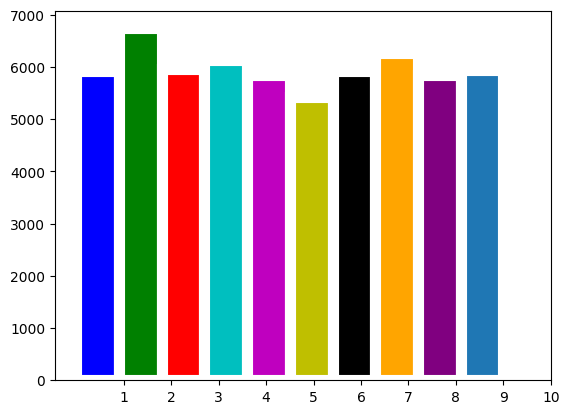

In [67]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

N, bins, patches = ax.hist(train_labels, edgecolor='white', linewidth=8)


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

for i in range(0,9):
    patches[i].set_facecolor(colors[i])


ax.set_xticks(np.arange(1, len(bins)))

plt.show()



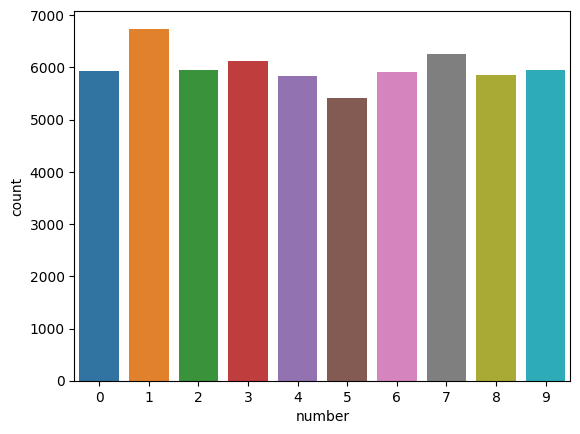

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(train_labels, columns=['number'])

sns.countplot(data=df, x='number')
plt.show()

In [45]:
type(train_labels)

numpy.ndarray

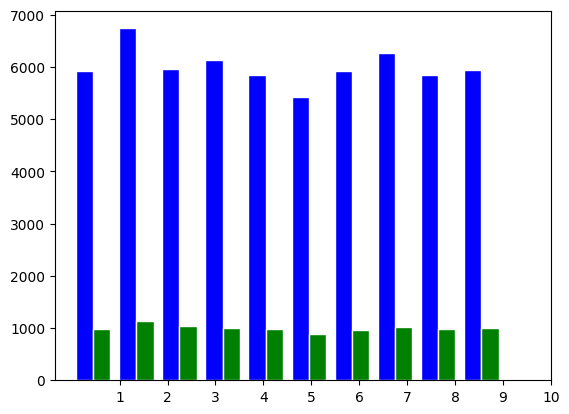

In [46]:
fig, ax = plt.subplots()
data = np.random.rand(1000)



N, bins, patches = ax.hist([train_labels, test_labels], bins=10, edgecolor='white', linewidth=1, color=['b', 'g'])

ax.set_xticks(np.arange(1, len(bins)))

plt.show()

In [47]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels, num_classes=10)
test_labels_one_hot = to_categorical(test_labels, num_classes=10)

In [48]:
test_labels_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
#encoding
input_img = Input(shape=(784,))
encoded = Dense(500, activation='relu')(input_img)
encoded = Dense(240, activation='relu')(encoded)
encoded = Dense(100, activation='relu')(encoded)

output = Dense(30, activation='relu')(encoded)


In [50]:
#decoding
decoded = Dense(100, activation='relu')(output)
decoded = Dense(240, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)

model = Dense(784, activation='sigmoid')(decoded)

In [51]:
autoencoder = Model(input_img, model)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#metrics=['accuracy']
history_autoencoder = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 14s 53ms/step - loss: 0.2203 - val_loss: 0.1463
Epoch 2/50
235/235 [==============================] - 14s 59ms/step - loss: 0.1317 - val_loss: 0.1204
Epoch 3/50
235/235 [==============================] - 12s 51ms/step - loss: 0.1153 - val_loss: 0.1097
Epoch 4/50
235/235 [==============================] - 11s 48ms/step - loss: 0.1075 - val_loss: 0.1034
Epoch 5/50
235/235 [==============================] - 11s 46ms/step - loss: 0.1027 - val_loss: 0.0997
Epoch 6/50
235/235 [==============================] - 12s 50ms/step - loss: 0.0988 - val_loss: 0.0968
Epoch 7/50
235/235 [==============================] - 12s 51ms/step - loss: 0.0956 - val_loss: 0.0935
Epoch 8/50
235/235 [==============================] - 12s 51ms/step - loss: 0.0931 - val_loss: 0.0918
Epoch 9/50
235/235 [==============================] - 12s 53ms/step - loss: 0.0911 - val_loss: 0.0901
Epoch 10/50
235/235 [==============================] - 11s 48ms/step - loss: 0.089

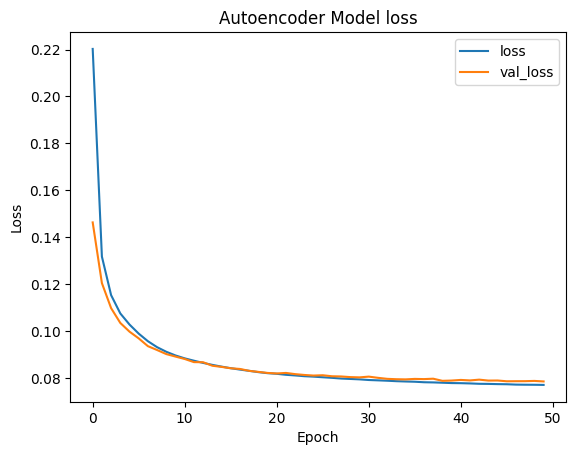

In [52]:
plt.plot(history_autoencoder.history['loss'])
plt.plot(history_autoencoder.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [53]:
encoded_imgs_test = autoencoder.predict(X_test)


313/313 [==============================] - 2s 5ms/step


In [54]:
encoded_imgs_train = autoencoder.predict(X_train)


1875/1875 [==============================] - 10s 5ms/step


In [55]:
print("Shape of decoded_imgs:", encoded_imgs_train.shape)
print("Shape of train_labels:", train_labels.shape)
print("Number of samples in decoded_imgs:", len(encoded_imgs_train))
print("Number of samples in train_labels:", len(train_labels))
print(X_train.shape)

Shape of decoded_imgs: (60000, 784)
Shape of train_labels: (60000,)
Number of samples in decoded_imgs: 60000
Number of samples in train_labels: 60000
(60000, 784)


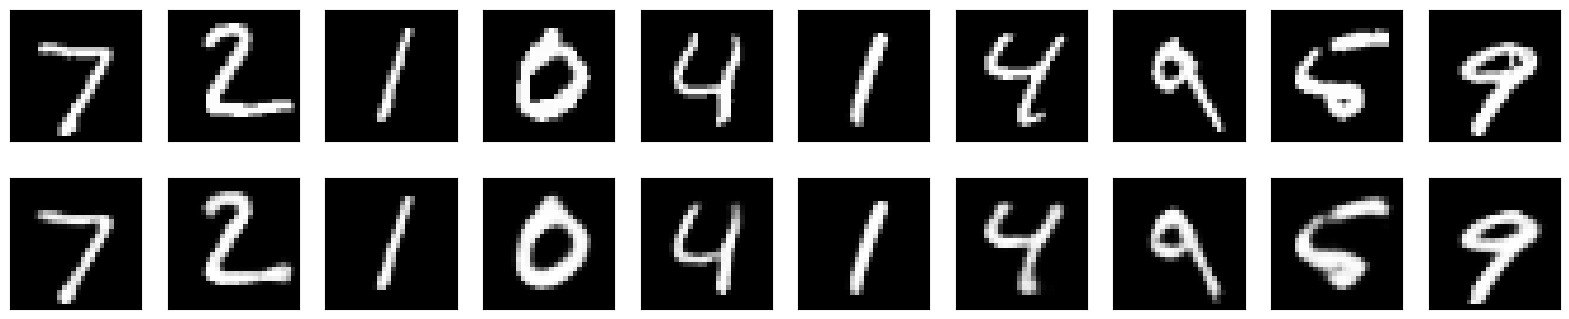

In [56]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [57]:

inputs = Input(shape=(784,))

model2 = Dense(128, activation='relu')(inputs)
model2 = Dropout(0.3)(model2)

model2 = Dense(64, activation='relu')(model2)
model2 = Dropout(0.5)(model2)

model2 = Dense(32, activation='relu')(model2)
model2 = Dropout(0.2)(model2)


model2 = Dense(10, activation='softmax')(model2)
model2 = Model(inputs=inputs, outputs=model2)

model2.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy'])

In [58]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0   

In [59]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau , ModelCheckpoint
from math import ceil


batch_size = 64
epoch_num = 100

train_steps = ceil(X_train.shape[0] / batch_size)
valid_steps = ceil(X_test.shape[0] / batch_size)



es = EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=10,
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, #
     )

rp = ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )



In [23]:
history = model2.fit(encoded_imgs_train,
                     train_labels_one_hot,
                     epochs=epoch_num,
                     steps_per_epoch=train_steps,
                     validation_data=(encoded_imgs_test, test_labels_one_hot),
                     validation_steps=valid_steps,
                     callbacks=[es, rp]
                     )

Epoch 1/100
938/938 [==============================] - 8s 7ms/step - loss: 0.7055 - accuracy: 0.7724 - val_loss: 0.2045 - val_accuracy: 0.9443 - lr: 0.0010
Epoch 2/100
938/938 [==============================] - 8s 9ms/step - loss: 0.3050 - accuracy: 0.9173 - val_loss: 0.1611 - val_accuracy: 0.9574 - lr: 0.0010
Epoch 3/100
938/938 [==============================] - 5s 6ms/step - loss: 0.2427 - accuracy: 0.9362 - val_loss: 0.1501 - val_accuracy: 0.9610 - lr: 0.0010
Epoch 4/100
938/938 [==============================] - 6s 6ms/step - loss: 0.2135 - accuracy: 0.9437 - val_loss: 0.1413 - val_accuracy: 0.9638 - lr: 0.0010
Epoch 5/100
938/938 [==============================] - 6s 7ms/step - loss: 0.1973 - accuracy: 0.9476 - val_loss: 0.1272 - val_accuracy: 0.9664 - lr: 0.0010
Epoch 6/100
938/938 [==============================] - 5s 5ms/step - loss: 0.1755 - accuracy: 0.9535 - val_loss: 0.1191 - val_accuracy: 0.9674 - lr: 0.0010
Epoch 7/100
938/938 [==============================] - 6s 7ms/st

In [24]:
n_epochs = len(history.history['loss'])
n_epochs

30

In [25]:

model2.evaluate(X_test, test_labels_one_hot, batch_size=32, verbose=2)

313/313 - 1s - loss: 0.1078 - accuracy: 0.9749 - 526ms/epoch - 2ms/step


[0.10784028470516205, 0.9749000072479248]

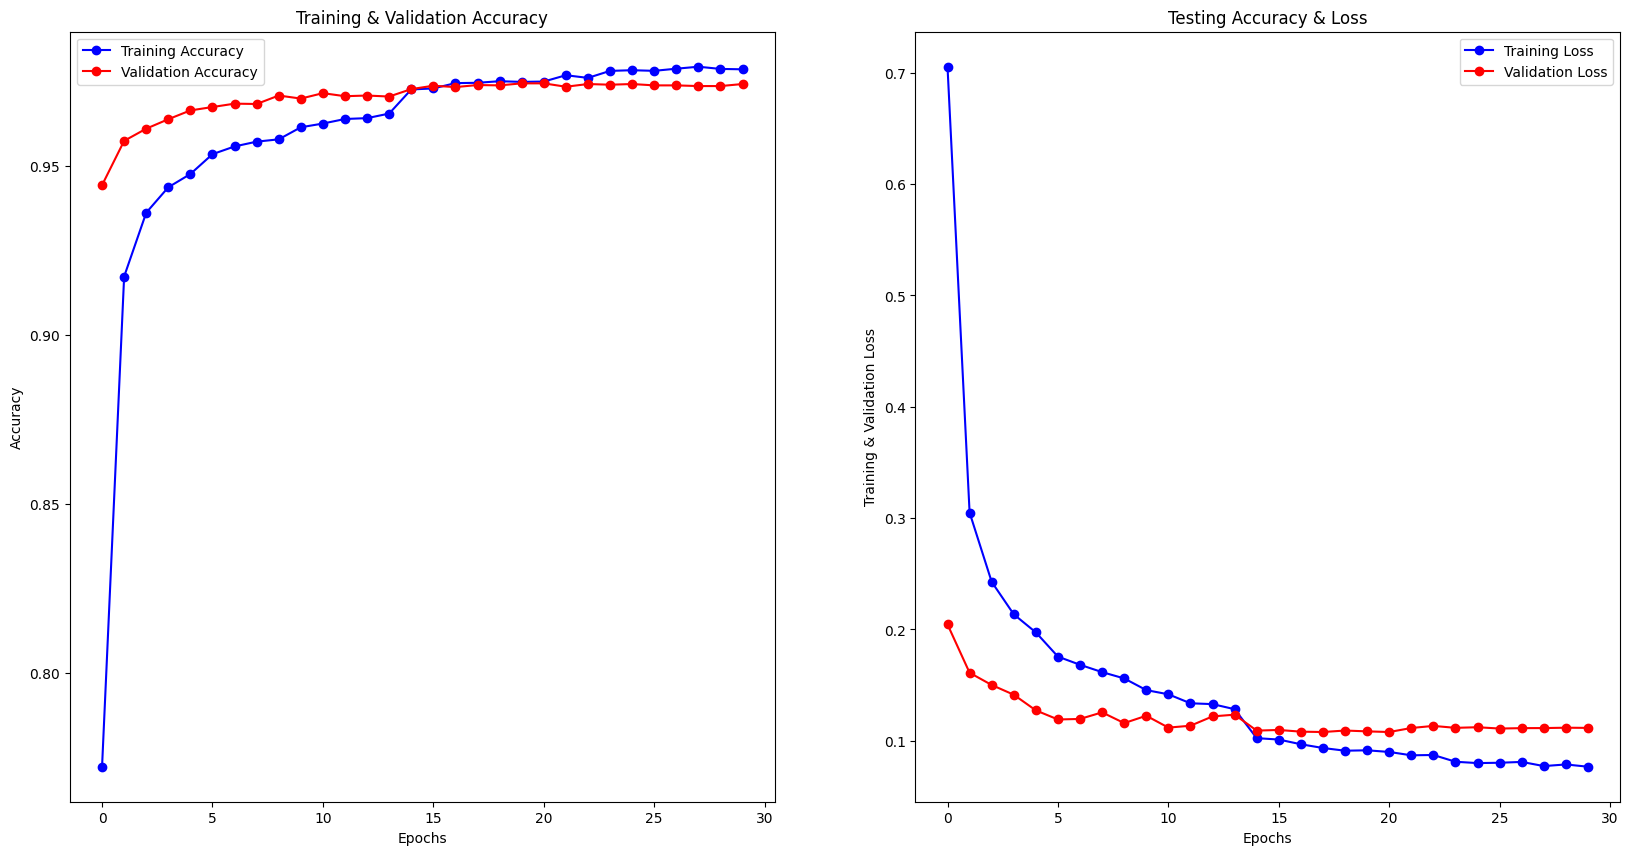

In [26]:
epochs = [i for i in range(n_epochs)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'bo-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'b-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [27]:
pred = model2.predict(encoded_imgs_train)

1875/1875 [==============================] - 4s 2ms/step


313/313 [==============================] - 1s 2ms/step


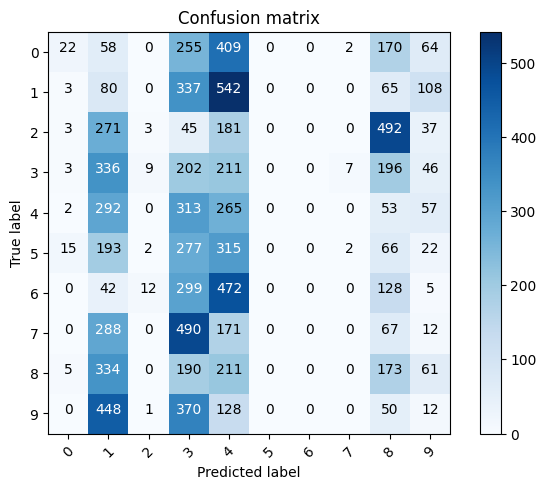

In [80]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset

Y_pred = model2.predict(encoded_imgs_test)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels_one_hot,axis = 1)

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))